In [1]:
import torch
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
transform = torch.load("../Data/synthetic-data/train-DAS/CWT-edDAS/transform0000_window1.pt")
sample = torch.load("../Data/synthetic-data/train-DAS/CWT-edDAS/samples0000.pt")
print(transform.shape)

torch.Size([512, 3000, 63])


In [3]:
features = np.array(transform)
features = np.reshape(features, (features.shape[0] * features.shape[1], -1))
print(features.shape)
n_cluters= 4
kmeans = KMeans(n_clusters= n_cluters)
kmeans.fit(features)

(1536000, 63)


KMeans(n_clusters=4)

In [4]:
labels = np.array(kmeans.labels_)
labels= np.reshape(labels, (transform.shape[0], transform.shape[1]))
print(labels.shape)
for i in range(n_cluters):
    print(np.count_nonzero(labels == i))

(512, 3000)
1131195
14410
376823
13572


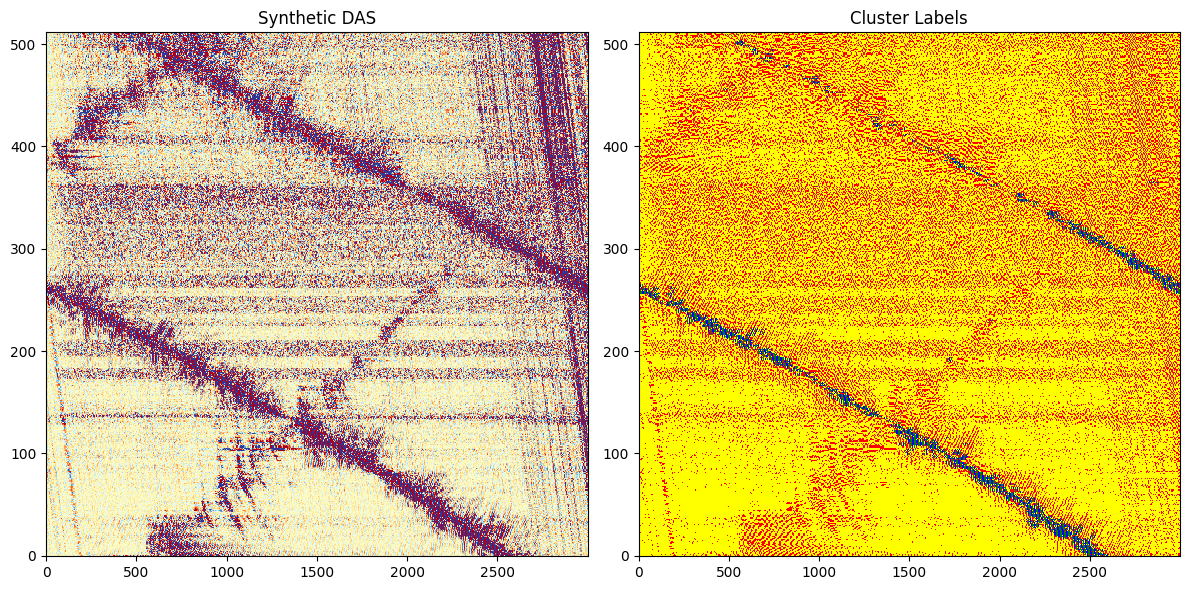

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12,6))
ax1.imshow((sample / sample.std(dim=-1, keepdim=True)).detach().cpu().numpy(), origin='lower', interpolation='nearest', cmap='RdYlBu', aspect='auto', vmin=-1, vmax=1)
cmap = mcolors.ListedColormap(['yellow', 'green', 'red', 'blue'])
ax2.imshow(labels, origin='lower', interpolation='nearest', cmap=cmap, aspect='auto')
ax1.set_title("Synthetic DAS")
ax2.set_title("Cluster Labels")
plt.tight_layout()
plt.show()